In [178]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Student Grades Dataset

In [4]:
students_csv = 'data/student_grades/student-mat.csv'
sdf = pd.read_csv(students_csv)
sdf.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [16]:
objs = sdf.dtypes[sdf.dtypes == 'object']  
objs = objs.index.tolist()
objs

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [22]:
for col in objs:
    print(f"Column: {col} has {sdf[col].nunique()} unique values")
    print(sdf[col].value_counts())
    print("\n")

Column: school has 2 unique values
school
GP    349
MS     46
Name: count, dtype: int64


Column: sex has 2 unique values
sex
F    208
M    187
Name: count, dtype: int64


Column: address has 2 unique values
address
U    307
R     88
Name: count, dtype: int64


Column: famsize has 2 unique values
famsize
GT3    281
LE3    114
Name: count, dtype: int64


Column: Pstatus has 2 unique values
Pstatus
T    354
A     41
Name: count, dtype: int64


Column: Mjob has 5 unique values
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64


Column: Fjob has 5 unique values
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64


Column: reason has 4 unique values
reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64


Column: guardian has 3 unique values
guardian
mother    273
father     90
other      32
Name: count, dtype: int64


Colu

In [39]:
class OneHotEncode(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        for obj in objs:
            encoder = OneHotEncoder()
            matrix = encoder.fit_transform(X[[obj]])
            matrix = matrix.toarray()
            column_names = encoder.get_feature_names_out([obj])
            for i in range(len(matrix.T)):
                X[column_names[i]] = matrix.T[i]
        X =  X.drop(objs, axis = 1 , errors = 'ignore')
        return X

class StandardizeAll(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        return X
        
pipline = Pipeline([
    ('onehotencode', OneHotEncode()),
])

pipline_standardize = Pipeline([
    ('standardize', StandardScaler())
])

X , y = sdf.drop('G3', axis = 1) , sdf['G3']


X_fit = pipline.fit_transform(X) 
X_fit.shape , y.shape

((395, 58), (395,))

In [41]:
X_Std = pipline_standardize.fit_transform(X_fit)
X_Std.shape , y.shape

((395, 58), (395,))

In [46]:
np.save('data/student_grades/X.npy', X_Std)
np.save('data/student_grades/y.npy', y)
np.save('data/student_grades/columns.npy', X_fit.columns)

In [44]:
df = pd.DataFrame(X_Std, columns=X_fit.columns)
df['G3'] = y
df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G3
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,...,-1.017881,-0.507899,0.507899,-0.23094,0.23094,2.232677,-2.232677,0.708450,-0.708450,6
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,...,-1.017881,1.968894,-1.968894,-0.23094,0.23094,-0.447893,0.447893,0.708450,-0.708450,6
2,-1.330954,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,0.062194,-0.236010,-0.997295,0.583385,...,-1.017881,-0.507899,0.507899,-0.23094,0.23094,-0.447893,0.447893,0.708450,-0.708450,10
3,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.054472,-1.238419,-0.997295,-0.540699,...,0.982433,-0.507899,0.507899,-0.23094,0.23094,-0.447893,0.447893,-1.411533,1.411533,15
4,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,...,-1.017881,-0.507899,0.507899,-0.23094,0.23094,2.232677,-2.232677,0.708450,-0.708450,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.592380,-0.685387,-0.479857,-0.643249,-0.042286,2.242901,1.178860,1.768808,0.801479,2.831553,...,-1.017881,-0.507899,0.507899,-0.23094,0.23094,2.232677,-2.232677,0.708450,-0.708450,9
391,0.238380,0.229234,-1.399970,0.792251,-1.235351,-0.449944,-2.171138,0.766399,1.700867,1.707469,...,-1.017881,1.968894,-1.968894,-0.23094,0.23094,-0.447893,0.447893,0.708450,-0.708450,16
392,3.377047,-1.600009,-1.399970,-0.643249,-1.235351,3.589323,1.178860,1.768808,-0.097908,1.707469,...,-1.017881,1.968894,-1.968894,-0.23094,0.23094,2.232677,-2.232677,0.708450,-0.708450,7
393,1.023046,0.229234,-0.479857,2.227751,-1.235351,-0.449944,0.062194,0.766399,-1.896683,1.707469,...,-1.017881,1.968894,-1.968894,-0.23094,0.23094,-0.447893,0.447893,0.708450,-0.708450,10


In [45]:
df.to_csv('data/student_grades/student_grades_processed.csv', index=False)

## Regression Check

In [528]:
X = np.load('data/student_grades/X.npy')
y = np.load('data/student_grades/y.npy')

In [529]:
X.shape

(395, 58)

In [530]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 58), (79, 58), (316,), (79,))

LinearRegression()

Mean Squared Error: 2.4702198421834773
Accuracy : 0.8465272763601812


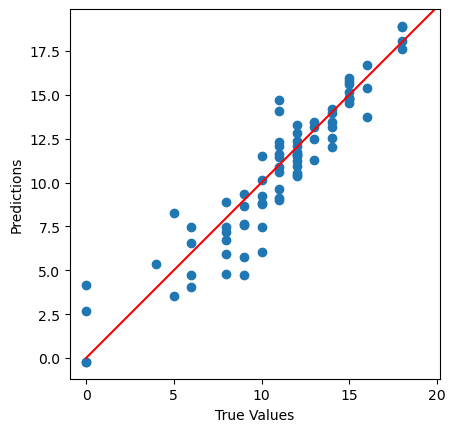

In [531]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Accuracy : {model.score(X_test, y_test)}")

_ = plt.scatter(y_test, y_pred)
_ = plt.xlabel('True Values')
_ = plt.ylabel('Predictions')
_ = plt.axis('equal')
_ = plt.axis('square')
_ = plt.plot([0, 20], [0, 20] , 'r')


RandomForestRegressor()

Mean Squared Error: 2.3854164556962028
Accuracy : 0.8517960408951539


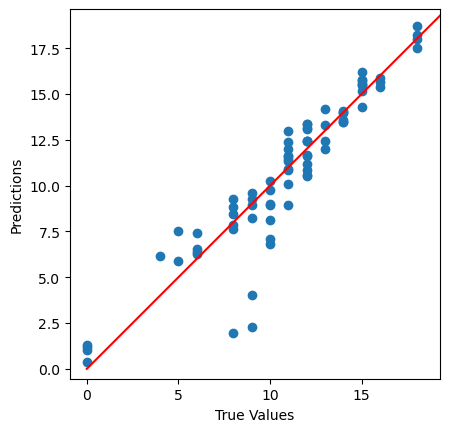

In [533]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Accuracy : {model.score(X_test, y_test)}")
_ = plt.scatter(y_test, y_pred)
_ = plt.xlabel('True Values')
_ = plt.ylabel('Predictions')
_ = plt.axis('equal')
_ = plt.axis('square')
_ = plt.plot([0, 20], [0, 20] , 'r')


# House Rent Dataset

In [471]:
hdf = pd.read_csv('data/house_rent/House_Rent_Dataset.csv')
hdf.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [472]:
hdf.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [473]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


(array([3.706e+03, 5.610e+02, 1.990e+02, 8.100e+01, 5.500e+01, 4.900e+01,
        1.000e+01, 3.100e+01, 1.600e+01, 1.300e+01, 4.000e+00, 7.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 4.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

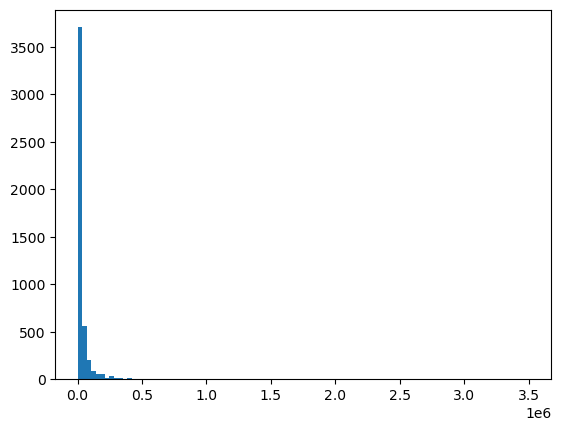

In [474]:
plt.hist(hdf['Rent'],bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x1920db3e580>,
 'caps': [<matplotlib.lines.Line2D at 0x1920db3eac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1920db3e2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1920db3efd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1920db4d2b0>],
 'means': []}

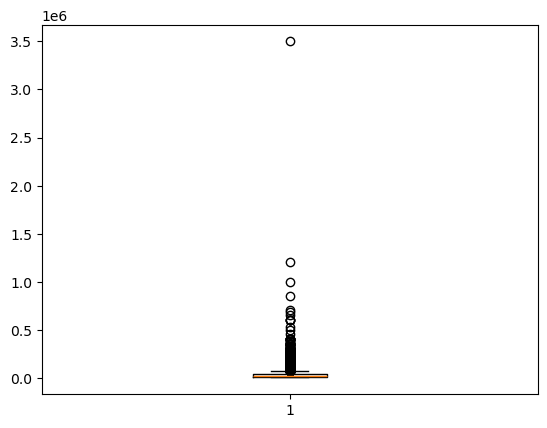

In [475]:
plt.boxplot(hdf['Rent'])

In [476]:
for i in np.sort(hdf['Rent'])[-5:]:
    print(f'{i:,}')

700,000
850,000
1,000,000
1,200,000
3,500,000


In [477]:
hdf = hdf[hdf['Rent'] < 250000]
hdf.shape

(4661, 12)

{'whiskers': [<matplotlib.lines.Line2D at 0x1920dba7970>,
 'caps': [<matplotlib.lines.Line2D at 0x1920dba7eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1920dba76d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1920dbb6430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1920dbb66d0>],
 'means': []}

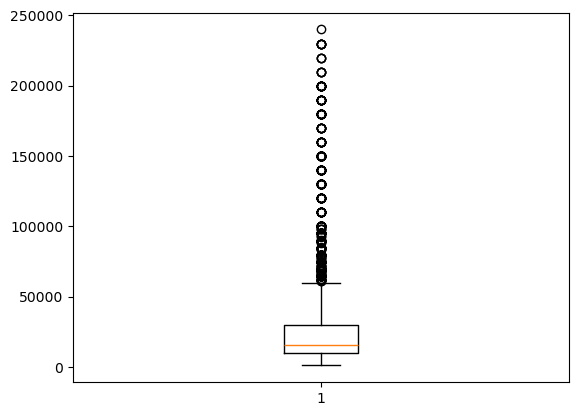

In [478]:
plt.boxplot(hdf['Rent'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1920dc08d00>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1920dc08c70>,
 'cmins': <matplotlib.collections.LineCollection at 0x1920dc1a340>,
 'cbars': <matplotlib.collections.LineCollection at 0x1920dc1a700>}

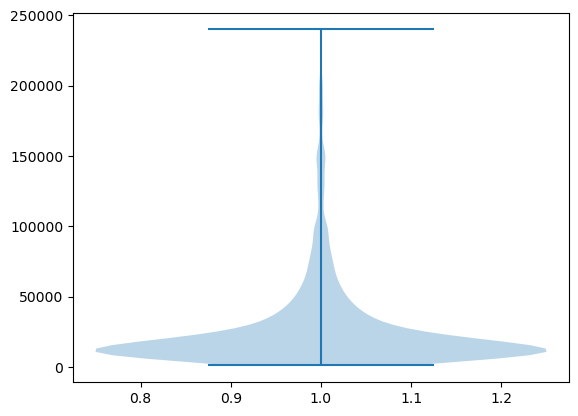

In [479]:
plt.violinplot(hdf['Rent'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1920dcc3d30>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1920dcc3ca0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1920dcd2370>,
 'cbars': <matplotlib.collections.LineCollection at 0x1920dcd2730>}

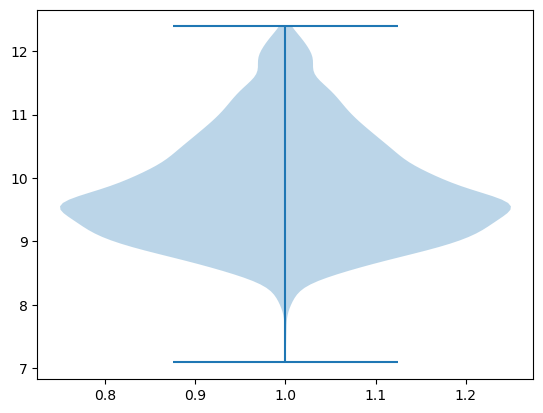

In [480]:
plt.violinplot(np.log(hdf['Rent']))

In [481]:
objs = hdf.dtypes[hdf.dtypes == 'object']  
objs = objs.index.tolist()
objs
for col in objs:
    print(f"Column: {col} has {hdf[col].nunique()} unique values")
    print(hdf[col].value_counts())
    print("\n")

['Posted On',
 'Floor',
 'Area Type',
 'Area Locality',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact']

Column: Posted On has 80 unique values
Posted On
2022-07-06    302
2022-05-12    149
2022-06-04    132
2022-05-23    125
2022-05-27    122
             ... 
2022-04-23      7
2022-04-25      6
2022-04-24      6
2022-04-26      2
2022-07-11      1
Name: count, Length: 80, dtype: int64


Column: Floor has 446 unique values
Floor
1 out of 2         378
Ground out of 2    349
2 out of 3         311
2 out of 4         306
1 out of 3         293
                  ... 
12 out of 27         1
16 out of 20         1
16 out of 37         1
11 out of 27         1
23 out of 34         1
Name: count, Length: 446, dtype: int64


Column: Area Type has 3 unique values
Area Type
Super Area     2438
Carpet Area    2221
Built Area        2
Name: count, dtype: int64


Column: Area Locality has 2206 unique values
Area Locality
Gachibowli                                29
Bandra West                               29
Electronic City                           24
Miyapur, NH 9                             22
Ve

In [482]:
hdf = hdf[hdf['Area Type'] != 'Built Area']
hdf = hdf[hdf['Point of Contact'] != 'Contact Builder']
hdf.shape

(4658, 12)

In [483]:
hdf = hdf[hdf['Floor'].str.find(' out of ') != -1]
hdf.shape

(4654, 12)

In [484]:
hdf[['Floor_Number', 'Floor_Total']] = hdf['Floor'].str.split(' out of ', expand=True) 
hdf = hdf.drop('Floor', axis=1)
hdf.shape


(4654, 13)

In [485]:
mapper = {'Ground' : '0' ,
    'Upper Basement' :'-1',
    'Lower Basement' :'-2'}
hdf['Floor_Number'] = hdf['Floor_Number'].apply(lambda x: mapper[x] if x in mapper.keys() else x )
hdf['Floor_Number'].unique()

array(['0', '1', '2', '4', '3', '5', '7', '8', '-1', '11', '-2', '6',
       '14', '13', '18', '9', '19', '60', '34', '12', '26', '25', '16',
       '10', '32', '28', '17', '20', '15', '40', '37', '22', '65', '21',
       '30', '35', '53', '41', '27', '45', '48', '23', '29', '49', '36',
       '24'], dtype=object)

In [486]:
hdf['Floor_Number'] = hdf['Floor_Number'].astype(int)
hdf['Floor_Total'].unique()
hdf['Floor_Total'] = hdf['Floor_Total'].astype(int)
hdf.shape

array(['2', '3', '1', '4', '5', '14', '8', '6', '19', '10', '7', '13',
       '18', '12', '24', '21', '23', '20', '9', '22', '58', '16', '66',
       '48', '40', '44', '42', '41', '32', '30', '29', '15', '11', '28',
       '17', '45', '35', '75', '38', '51', '43', '31', '25', '26', '27',
       '76', '60', '36', '37', '55', '68', '77', '50', '59', '62', '39',
       '54', '33', '46', '52', '71', '34'], dtype=object)

(4654, 13)

In [487]:
objs = hdf.dtypes[hdf.dtypes == 'object']  
objs = objs.index.tolist()
objs
for col in objs:
    print(f"Column: {col} has {hdf[col].nunique()} unique values")
    print(hdf[col].value_counts())
    print("\n")

['Posted On',
 'Area Type',
 'Area Locality',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact']

Column: Posted On has 80 unique values
Posted On
2022-07-06    302
2022-05-12    149
2022-06-04    132
2022-05-23    124
2022-05-27    122
             ... 
2022-04-23      7
2022-04-25      6
2022-04-24      6
2022-04-26      2
2022-07-11      1
Name: count, Length: 80, dtype: int64


Column: Area Type has 2 unique values
Area Type
Super Area     2435
Carpet Area    2219
Name: count, dtype: int64


Column: Area Locality has 2203 unique values
Area Locality
Bandra West                               29
Gachibowli                                29
Electronic City                           24
Miyapur, NH 9                             22
Velachery                                 22
                                          ..
Alpine Apartments, Chembur East            1
Sindhi Society, Chembur                    1
Lokhandwala Octacrest, Lokhandwala Twp     1
Valentine Apartments, Gokuldham            1
Manikonda, Hyderabad                       1
Name: count, Length: 2203, dtype: int64


C

In [488]:
hdf = hdf.set_index('Posted On')

In [489]:
hdf = hdf.sort_index()
hdf.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor_Number,Floor_Total
Posted On,,,,,,,,,,,,
2022-04-23,1,15000,1000,Super Area,Barrackpore,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2,3
2022-04-23,2,15000,1000,Super Area,Bansdroni,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
2022-04-23,2,7000,450,Carpet Area,safuipara,Kolkata,Furnished,Bachelors,2,Contact Owner,1,3
2022-04-23,1,6500,800,Carpet Area,Santragachi,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,0,1
2022-04-23,3,36125,1700,Super Area,Salt Lake City,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2


In [490]:
len(hdf['Area Locality'].unique())

2203

In [491]:
drop_cols = ['Area Locality']

In [492]:
hdf.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor_Number,Floor_Total
Posted On,,,,,,,,,,,,
2022-04-23,1,15000,1000,Super Area,Barrackpore,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2,3
2022-04-23,2,15000,1000,Super Area,Bansdroni,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
2022-04-23,2,7000,450,Carpet Area,safuipara,Kolkata,Furnished,Bachelors,2,Contact Owner,1,3
2022-04-23,1,6500,800,Carpet Area,Santragachi,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,0,1
2022-04-23,3,36125,1700,Super Area,Salt Lake City,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2


In [493]:
hdf = hdf.reset_index()
hdf.head()

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor_Number,Floor_Total
0,2022-04-23,1,15000,1000,Super Area,Barrackpore,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2,3
1,2022-04-23,2,15000,1000,Super Area,Bansdroni,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
2,2022-04-23,2,7000,450,Carpet Area,safuipara,Kolkata,Furnished,Bachelors,2,Contact Owner,1,3
3,2022-04-23,1,6500,800,Carpet Area,Santragachi,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,0,1
4,2022-04-23,3,36125,1700,Super Area,Salt Lake City,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2


In [494]:
objs = hdf.dtypes[hdf.dtypes == 'object']  
objs = objs.index.tolist()
for col in objs:
    print(f"{col} \t: has {hdf[col].nunique()} unique values")

Posted On 	: has 80 unique values
Area Type 	: has 2 unique values
Area Locality 	: has 2203 unique values
City 	: has 6 unique values
Furnishing Status 	: has 3 unique values
Tenant Preferred 	: has 3 unique values
Point of Contact 	: has 2 unique values


In [495]:
hdf['Bachelors'] = hdf['Tenant Preferred'].str.contains('Bachelors').astype(int)
hdf['Family'] = hdf['Tenant Preferred'].str.contains('Family').astype(int)
drop_cols.append('Tenant Preferred') 
hdf.head()

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor_Number,Floor_Total,Bachelors,Family
0,2022-04-23,1,15000,1000,Super Area,Barrackpore,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2,3,1,1
1,2022-04-23,2,15000,1000,Super Area,Bansdroni,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2,1,1
2,2022-04-23,2,7000,450,Carpet Area,safuipara,Kolkata,Furnished,Bachelors,2,Contact Owner,1,3,1,0
3,2022-04-23,1,6500,800,Carpet Area,Santragachi,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,0,1,1,1
4,2022-04-23,3,36125,1700,Super Area,Salt Lake City,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2,1,1


In [496]:
hdf['Furnishing Status'].unique()

array(['Unfurnished', 'Furnished', 'Semi-Furnished'], dtype=object)

In [497]:
hdf['Area Type'].unique()

array(['Super Area', 'Carpet Area'], dtype=object)

In [498]:
hdf.shape
hdf = hdf.drop(drop_cols , axis =1 , errors='ignore')
hdf.shape

(4654, 15)

(4654, 13)

In [499]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4654 entries, 0 to 4653
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4654 non-null   object
 1   BHK                4654 non-null   int64 
 2   Rent               4654 non-null   int64 
 3   Size               4654 non-null   int64 
 4   Area Type          4654 non-null   object
 5   City               4654 non-null   object
 6   Furnishing Status  4654 non-null   object
 7   Bathroom           4654 non-null   int64 
 8   Point of Contact   4654 non-null   object
 9   Floor_Number       4654 non-null   int32 
 10  Floor_Total        4654 non-null   int32 
 11  Bachelors          4654 non-null   int32 
 12  Family             4654 non-null   int32 
dtypes: int32(4), int64(4), object(5)
memory usage: 400.1+ KB


In [500]:
hdf['Posted On'] = pd.to_datetime(hdf['Posted On'])
hdf.head()
hdf.tail()


,Posted On,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Point of Contact,Floor_Number,Floor_Total,Bachelors,Family
0,2022-04-23,1,15000,1000,Super Area,Kolkata,Unfurnished,1,Contact Owner,2,3,1,1
1,2022-04-23,2,15000,1000,Super Area,Kolkata,Unfurnished,2,Contact Owner,0,2,1,1
2,2022-04-23,2,7000,450,Carpet Area,Kolkata,Furnished,2,Contact Owner,1,3,1,0
3,2022-04-23,1,6500,800,Carpet Area,Kolkata,Unfurnished,1,Contact Owner,0,1,1,1
4,2022-04-23,3,36125,1700,Super Area,Kolkata,Unfurnished,2,Contact Owner,0,2,1,1


,Posted On,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Point of Contact,Floor_Number,Floor_Total,Bachelors,Family
4649,2022-07-10,2,22000,1100,Carpet Area,Hyderabad,Furnished,2,Contact Agent,1,12,0,1
4650,2022-07-10,3,35000,1600,Carpet Area,Hyderabad,Semi-Furnished,3,Contact Agent,8,10,0,1
4651,2022-07-10,3,53000,1700,Carpet Area,Chennai,Furnished,3,Contact Agent,4,16,1,1
4652,2022-07-10,2,26000,1027,Super Area,Chennai,Semi-Furnished,2,Contact Agent,15,19,1,0
4653,2022-07-11,2,12000,550,Super Area,Chennai,Unfurnished,2,Contact Owner,0,1,1,1


In [501]:
hdf.head(2)

,Posted On,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Point of Contact,Floor_Number,Floor_Total,Bachelors,Family
0,2022-04-23,1,15000,1000,Super Area,Kolkata,Unfurnished,1,Contact Owner,2,3,1,1
1,2022-04-23,2,15000,1000,Super Area,Kolkata,Unfurnished,2,Contact Owner,0,2,1,1


In [502]:
objs

['Posted On',
 'Area Type',
 'Area Locality',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact']

In [503]:
hdf['Point of Contact'].unique()

array(['Contact Owner', 'Contact Agent'], dtype=object)

In [504]:
hdf['Area Type'] = hdf['Area Type'].map({'Carpet Area':1, 'Super Area':0})
hdf['Contact_thru_Agent'] = hdf['Point of Contact'].map({'Contact Agent':1, 'Contact Owner':0})
hdf.shape

(4654, 14)

In [505]:
objs = hdf.dtypes[hdf.dtypes == 'object']  
objs = objs.index.tolist()
for col in objs:
    print(f"{col} \t: has {hdf[col].nunique()} unique values")

City 	: has 6 unique values
Furnishing Status 	: has 3 unique values
Point of Contact 	: has 2 unique values


In [506]:
hdf.head()

,Posted On,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Point of Contact,Floor_Number,Floor_Total,Bachelors,Family,Contact_thru_Agent
0,2022-04-23,1,15000,1000,0,Kolkata,Unfurnished,1,Contact Owner,2,3,1,1,0
1,2022-04-23,2,15000,1000,0,Kolkata,Unfurnished,2,Contact Owner,0,2,1,1,0
2,2022-04-23,2,7000,450,1,Kolkata,Furnished,2,Contact Owner,1,3,1,0,0
3,2022-04-23,1,6500,800,1,Kolkata,Unfurnished,1,Contact Owner,0,1,1,1,0
4,2022-04-23,3,36125,1700,0,Kolkata,Unfurnished,2,Contact Owner,0,2,1,1,0


In [507]:
encoder = OneHotEncoder()
matrix = encoder.fit_transform(hdf[['City']])
matrix = matrix.toarray()
column_names = encoder.get_feature_names_out(['City'])
for i in range(len(matrix.T)):
    hdf[column_names[i]] = matrix.T[i]

In [508]:
encoder = OneHotEncoder()
matrix = encoder.fit_transform(hdf[['Furnishing Status']])
matrix = matrix.toarray()
column_names = encoder.get_feature_names_out(['Furnishing Status'])
for i in range(len(matrix.T)):
    hdf[column_names[i]] = matrix.T[i]

In [509]:
hdf.shape

(4654, 23)

In [510]:
hdf.head()

,Posted On,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Point of Contact,Floor_Number,...,Contact_thru_Agent,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
0,2022-04-23,1,15000,1000,0,Kolkata,Unfurnished,1,Contact Owner,2,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2022-04-23,2,15000,1000,0,Kolkata,Unfurnished,2,Contact Owner,0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2022-04-23,2,7000,450,1,Kolkata,Furnished,2,Contact Owner,1,...,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2022-04-23,1,6500,800,1,Kolkata,Unfurnished,1,Contact Owner,0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2022-04-23,3,36125,1700,0,Kolkata,Unfurnished,2,Contact Owner,0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [511]:
time_based_indexes = hdf[['Posted On']]
time_based_indexes.head()

,Posted On
0,2022-04-23
1,2022-04-23
2,2022-04-23
3,2022-04-23
4,2022-04-23


In [512]:
hdf = hdf.drop(['Posted On', 'City' , 'Point of Contact','Furnishing Status'] ,axis = 1, errors='ignore')
hdf.shape

(4654, 19)

In [513]:
hdf.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'Bathroom', 'Floor_Number',
       'Floor_Total', 'Bachelors', 'Family', 'Contact_thru_Agent',
       'City_Bangalore', 'City_Chennai', 'City_Delhi', 'City_Hyderabad',
       'City_Kolkata', 'City_Mumbai', 'Furnishing Status_Furnished',
       'Furnishing Status_Semi-Furnished', 'Furnishing Status_Unfurnished'],
      dtype='object')

In [514]:
hdf.columns = ['BHK', 'Rent', 'Size', 'Area', 'Bathroom', 'Floor_Number',
       'Floor_Total', 'Bachelors', 'Family', 'Contact_thru_Agent',
       'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Kolkata', 'Mumbai', 'Furnished',
       'Semi_Furnished', 'Unfurnished']
hdf.head()

,BHK,Rent,Size,Area,Bathroom,Floor_Number,Floor_Total,Bachelors,Family,Contact_thru_Agent,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Furnished,Semi_Furnished,Unfurnished
0,1,15000,1000,0,1,2,3,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,15000,1000,0,2,0,2,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,7000,450,1,2,1,3,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1,6500,800,1,1,0,1,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,3,36125,1700,0,2,0,2,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [515]:
hdf_y = hdf['Rent']
hdf = hdf.drop(['Rent'] ,axis = 1)
hdf.shape, hdf_y.shape

((4654, 18), (4654,))

In [516]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4654 entries, 0 to 4653
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BHK                 4654 non-null   int64  
 1   Size                4654 non-null   int64  
 2   Area                4654 non-null   int64  
 3   Bathroom            4654 non-null   int64  
 4   Floor_Number        4654 non-null   int32  
 5   Floor_Total         4654 non-null   int32  
 6   Bachelors           4654 non-null   int32  
 7   Family              4654 non-null   int32  
 8   Contact_thru_Agent  4654 non-null   int64  
 9   Bangalore           4654 non-null   float64
 10  Chennai             4654 non-null   float64
 11  Delhi               4654 non-null   float64
 12  Hyderabad           4654 non-null   float64
 13  Kolkata             4654 non-null   float64
 14  Mumbai              4654 non-null   float64
 15  Furnished           4654 non-null   float64
 16  Semi_F

In [517]:
scaler = MinMaxScaler()
hdf_X = scaler.fit_transform(hdf)
hdf_X

array([[0.        , 0.12390488, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.2       , 0.12390488, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.2       , 0.05506884, 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.4       , 0.21151439, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.2       , 0.12728411, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.2       , 0.06758448, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [518]:
hdf_X.shape

(4654, 18)

In [519]:
train_size = int(0.7 * len(hdf))
valid_size = int(0.1 * len(hdf))
test_size = len(hdf) - train_size - valid_size
train_size , valid_size , test_size , train_size + valid_size + test_size
hdf_X.shape[0] ==  train_size + valid_size + test_size

(3257, 465, 932, 4654)

True

In [520]:
# time based splitting
X_train = hdf_X[:train_size]
y_train = hdf_y[:train_size]
X_valid = hdf_X[train_size:train_size + valid_size]
y_valid = hdf_y[train_size:train_size + valid_size]
X_test = hdf_X[train_size + valid_size:]
y_test = hdf_y[train_size + valid_size:]

X_train.shape, X_valid.shape, X_test.shape,y_train.shape, y_valid.shape, y_test.shape

((3257, 18), (465, 18), (932, 18), (3257,), (465,), (932,))

In [521]:
np.save('./data/house_rent/X.npy',hdf_X)
np.save('./data/house_rent/y.npy',hdf_y)
np.save('data/student_grades/columns.npy', hdf.columns)

## Regression Check

In [522]:
X = np.load('data/house_rent/X.npy')
y = np.load('data/house_rent/y.npy')

In [523]:
X.shape,y.shape

((4654, 18), (4654,))

In [524]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3723, 18), (931, 18), (3723,), (931,))

LinearRegression()

Mean Squared Error: 415821612.9892589
Accuracy : 0.6440990069660706


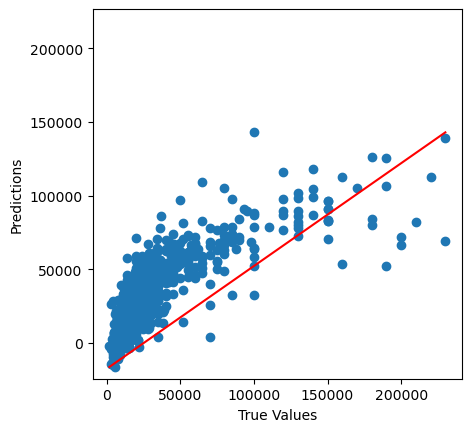

In [525]:
from regex import F
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Accuracy : {model.score(X_test, y_test)}")

_ = plt.scatter(y_test, y_pred)
_ = plt.xlabel('True Values')
_ = plt.ylabel('Predictions')
_ = plt.axis('equal')
_ = plt.axis('square')
_ = plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_pred), np.max(y_pred)],'r')


RandomForestRegressor()

Mean Squared Error: 255344612.98593032
Accuracy : 0.7814509912694113


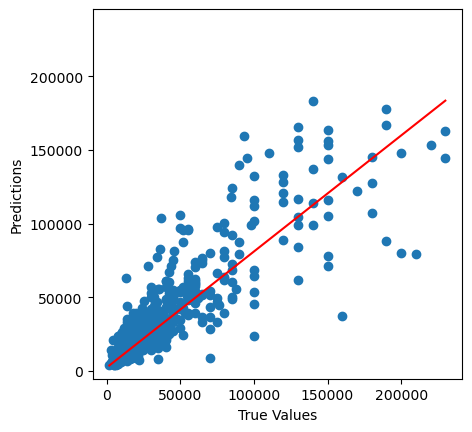

In [526]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Accuracy : {model.score(X_test, y_test)}")
_ = plt.scatter(y_test, y_pred)
_ = plt.xlabel('True Values')
_ = plt.ylabel('Predictions')
_ = plt.axis('equal')
_ = plt.axis('square')
_ = plt.plot([np.min(y_test), np.max(y_test)],[np.min(y_pred), np.max(y_pred)],'r')

